In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

In [26]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [29]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centers = kmeans.cluster_centers_

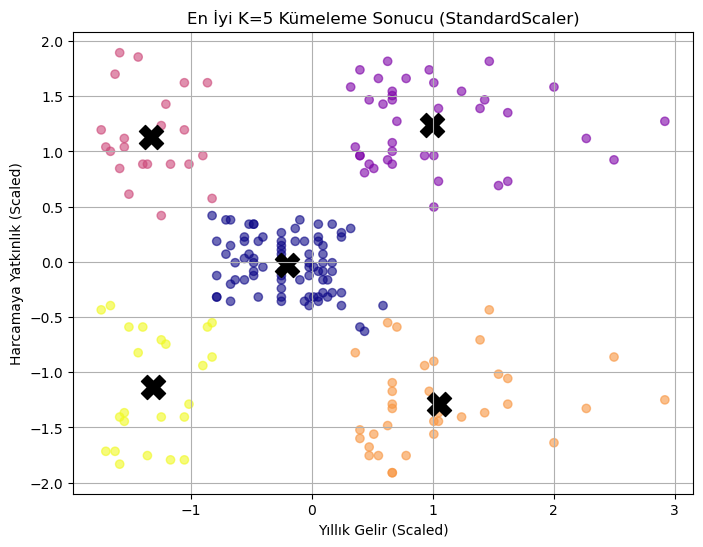

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='plasma', alpha=0.6)
plt.scatter(centers[:,0], centers[:,1], s=300, c='black', marker='X')
plt.title('En İyi K=5 Kümeleme Sonucu (StandardScaler)')
plt.xlabel('Yıllık Gelir (Scaled)')
plt.ylabel('Harcamaya Yatkınlık (Scaled)')
plt.grid(True)
plt.show()


In [31]:
db_index = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index (K=5, StandardScaler): {db_index:.3f}")


Davies-Bouldin Index (K=5, StandardScaler): 0.572


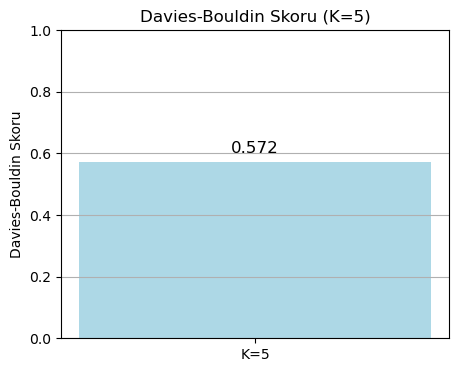

In [32]:
plt.figure(figsize=(5,4))
plt.bar(['K=5'], [db_index], color='lightblue')
plt.text(0, db_index + 0.02, f"{db_index:.3f}", ha='center', va='bottom', fontsize=12)
plt.title('Davies-Bouldin Skoru (K=5)')
plt.ylabel('Davies-Bouldin Skoru')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


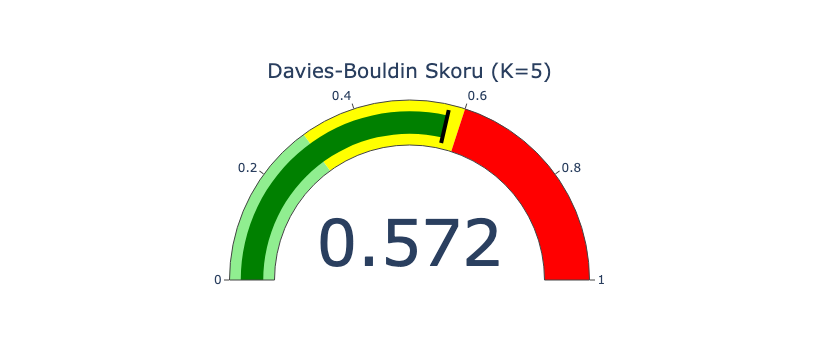

In [33]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = db_index,  # burada db_index = 0.572 gibi
    title = {'text': "Davies-Bouldin Skoru (K=5)"},
    gauge = {
        'axis': {'range': [0, 1]},
        'bar': {'color': "green"},
        'steps': [
            {'range': [0, 0.3], 'color': "lightgreen"},
            {'range': [0.3, 0.6], 'color': "yellow"},
            {'range': [0.6, 1], 'color': "red"}
        ],
        'threshold': {
            'line': {'color': "black", 'width': 4},
            'thickness': 0.75,
            'value': db_index
        }
    }
))

fig.show()
